<a href="https://colab.research.google.com/github/himanshu-tawra/COVID-19-Detector-Flask-App-from-Chest-X-ray-Images-with-Keras-and-Deep-Learning/blob/master/ResNet18_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://www.dropbox.com/sh/c2uaggwlb2hosof/AABAu2Uv3u81izc4rWk9zxgna?dl=0

--2020-11-05 21:20:22--  https://www.dropbox.com/sh/c2uaggwlb2hosof/AABAu2Uv3u81izc4rWk9zxgna?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:6019:1::a27d:401
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/c2uaggwlb2hosof/AABAu2Uv3u81izc4rWk9zxgna [following]
--2020-11-05 21:20:22--  https://www.dropbox.com/sh/raw/c2uaggwlb2hosof/AABAu2Uv3u81izc4rWk9zxgna
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc65bf958462c6cd3e4d4ec2747.dl.dropboxusercontent.com/zip_download_get/AmBmU0JnZO8Nupidl3zX9MqbkZ-UecA7MsQtmFmhdfH6gzM5tzNHbwWMb0URlYzOOipvWfzWi2CuBFvtpN4Z928hde5teLiXLzFf97lEPeDdlQ [following]
--2020-11-05 21:20:24--  https://ucc65bf958462c6cd3e4d4ec2747.dl.dropboxusercontent.com/zip_download_get/AmBmU0JnZO8Nupidl3zX9MqbkZ-UecA7MsQtmFmhdfH6gzM5tzNHbwWMb0URlYzOOipvWfzWi2CuBFvtpN4Z

In [5]:
!unzip AABAu2Uv3u81izc4rWk9zxgna?dl=0

Archive:  AABAu2Uv3u81izc4rWk9zxgna?dl=0
mapname:  conversion of  failed
   creating: Val/
   creating: Test/
   creating: Train/
   creating: Val/Covid/
   creating: Test/Covid/
   creating: Val/Normal/
   creating: Train/Covid/
   creating: Test/Normal/
   creating: Train/Normal/
 extracting: Train/Covid/AR-2.jpg    
 extracting: Train/Covid/AR-1.jpg    
 extracting: Test/Covid/paving.jpg   
 extracting: Val/Covid/d009d61f.jpg  
 extracting: Val/Covid/e1446fe8.jpg  
 extracting: Val/Covid/d9d6ca9a.jpg  
 extracting: Val/Covid/f6d980a0.jpg  
 extracting: Val/Covid/ec083e35.jpg  
 extracting: Test/Covid/f8335316.jpg  
 extracting: Test/Covid/f6575117.jpg  
 extracting: Test/Covid/f64132c8.jpg  
 extracting: Train/Covid/5782ae15.jpg  
 extracting: Train/Covid/bb0e626a.jpg  
 extracting: Train/Covid/82a78c13.jpg  
 extracting: Train/Covid/a361d7b7.jpg  
 extracting: Train/Covid/1052b0fe.jpg  
 extracting: Train/Covid/a2eba651.jpg  
 extracting: Train/Covid/bd10d5e2.jpg  
 extracting: Tra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,VGG16
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.applications.resnet import ResNet50
import keras

In [2]:
IMAGE_SIZE = [224,224]

In [3]:
res = ResNet50(input_shape= IMAGE_SIZE + [3] , weights='imagenet',include_top=False)

In [4]:
for layer in res.layers:
  layer.trainable = False

In [5]:
res_output = res.output

In [6]:
flatten = Flatten()(res_output)
dense_layer1 = Dense(activation= 'relu',units=256)(flatten)
#dropout_1 = Dropout(rate = 0.5)(dense_layer1)
dense_layer2 = Dense(activation = 'relu',units = 128)(dense_layer1)
#dropout_2 = Dropout(rate = 0.3)(dense_layer2)
#dense_layer3 = Dense(activation='relu',units=64)(dense_layer2)
output_layer = Dense(2,activation='softmax')(dense_layer2)

In [7]:
model = Model(inputs = res.input,outputs = output_layer)

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [9]:
model.compile(
    optimizer='adam',  # Low learning rate
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
training_data_gen = ImageDataGenerator(
    rescale = 1./255.,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True
)

In [11]:
val_data_gen = ImageDataGenerator(
    rescale = 1./255.
)

In [12]:
training_set = training_data_gen.flow_from_directory(
    'Train/',
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 251 images belonging to 2 classes.


In [13]:
val_set = val_data_gen.flow_from_directory(
    'Val/',
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 70 images belonging to 2 classes.


In [14]:
r = model.fit(
    training_set,
    epochs = 100,
    validation_data = val_set,
    validation_steps = len(val_set),
    steps_per_epoch = len(training_set)
    
)

Epoch 1/100
8/8 [==============================] - 9s 1s/step - loss: 4.2984 - accuracy: 0.4900 - val_loss: 2.6011 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 8s 986ms/step - loss: 2.1522 - accuracy: 0.5060 - val_loss: 0.7373 - val_accuracy: 0.5143
Epoch 3/100
8/8 [==============================] - 8s 978ms/step - loss: 0.8018 - accuracy: 0.5817 - val_loss: 0.3449 - val_accuracy: 0.8143
Epoch 4/100
8/8 [==============================] - 8s 997ms/step - loss: 0.3315 - accuracy: 0.8725 - val_loss: 0.1689 - val_accuracy: 0.9714
Epoch 5/100
8/8 [==============================] - 8s 984ms/step - loss: 0.2756 - accuracy: 0.9044 - val_loss: 0.1624 - val_accuracy: 0.9429
Epoch 6/100
8/8 [==============================] - 8s 1s/step - loss: 0.3069 - accuracy: 0.8446 - val_loss: 0.6441 - val_accuracy: 0.7143
Epoch 7/100
8/8 [==============================] - 8s 1s/step - loss: 0.3880 - accuracy: 0.8287 - val_loss: 0.1983 - val_accuracy: 0.9143
Epoch 8/100
8/8 [=====

In [15]:
test_pred = []
test_actual = []
label_dict = {
    0 : "Covid",
    1 : "Normal"
}

In [16]:
def image_preprocessing(path):
  for filename in os.listdir(path):

    if path == 'Test/Covid':
      filepath = os.path.join(path,filename)
      test_image = image.load_img(filepath,target_size=(224,224))
      image_array = image.img_to_array(test_image)
      image_array = np.expand_dims(image_array,axis = 0)
      rescaled_image = image_array/255. 
      predicted_image = model.predict(rescaled_image)
      predicted_image = label_dict[predicted_image.argmax()]
      test_pred.append(predicted_image)
      test_actual.append('Covid')

    elif path == 'Test/Normal':
      filepath = os.path.join(path,filename)
      test_image = image.load_img(filepath,target_size=(224,224))
      image_array = image.img_to_array(test_image)
      image_array = np.expand_dims(image_array,axis = 0)
      rescaled_image = image_array/255. 
      predicted_image = model.predict(rescaled_image)
      predicted_image = label_dict[predicted_image.argmax()]
      test_pred.append(predicted_image)
      test_actual.append('Normal')

In [17]:
covid_path = 'Test/Covid'
normal_path = 'Test/Normal'

In [18]:
image_preprocessing(covid_path)
image_preprocessing(normal_path)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm = confusion_matrix(test_pred,test_actual)

In [21]:
print(cm)

[[32  0]
 [ 3 35]]


In [22]:
import seaborn as sns

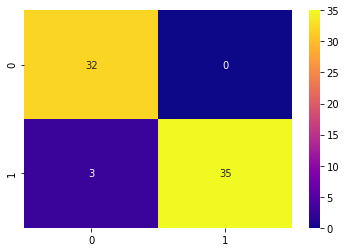

In [23]:
sns.heatmap(cm,cmap = 'plasma',annot = True)

In [24]:
from sklearn.metrics import precision_recall_fscore_support

In [25]:
prf = precision_recall_fscore_support(test_actual,test_pred,labels = ['Covid','Normal'])

In [26]:
print(prf)

(array([1.        , 0.92105263]), array([0.91428571, 1.        ]), array([0.95522388, 0.95890411]), array([35, 35]))


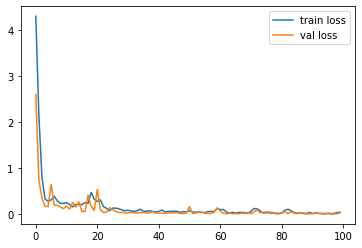

In [27]:
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()

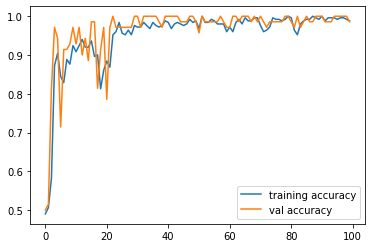

In [28]:
plt.plot(r.history['accuracy'],label = 'training accuracy')
plt.plot(r.history['val_accuracy'],label = 'val accuracy')
plt.legend()
plt.show()